# Decision Tree

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/drive/My Drive/pp-ML/

/content/drive/My Drive/pp-ML


In [ ]:
df = pd.read_csv("loan_balanceado.csv", index_col= 0)
df.head()

,dependents,education,self_employed,loan_amount_term,credit_history,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,3,2,2,3,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1,1
1,2,2,2,3,1,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0,0
2,3,2,1,3,1,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1,1
3,3,1,2,3,1,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1,1
4,3,2,2,3,1,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1,1


In [ ]:
df_metricas = pd.read_csv("metricas_estandarizadas.csv", index_col= 0)
df_metricas.head()

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.702899,0.662500,0.791045,0.721088,0.408530,test,Regresión logistica estandar
1,0.743636,0.703593,0.848375,0.769231,0.486471,train,Regresión logistica estandar


In [ ]:

X1 = df.drop("loan_status", axis = 1)
y1 = df["loan_status"]

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [ ]:
arbol = DecisionTreeClassifier(random_state =0)
arbol.fit(x_train1, y_train1)


DecisionTreeClassifier(random_state=0)

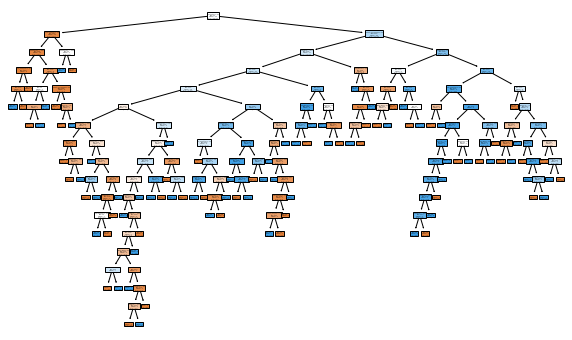

In [ ]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

In [ ]:
max_features = np.sqrt(len(x_train1.columns))
max_features

3.872983346207417

In [ ]:
print(arbol.tree_.max_depth)

17


In [ ]:
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [ ]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [ ]:
dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.811594,0.859649,0.731343,0.790323,0.621279,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


Observamos que tenemos mucho overfitting, vamos a modificar los hiperparámetros para ajustar mejor nuestro modelo:

In [ ]:

param = {"max_depth": [8, 10, 12, 14, 16],
        "max_features": [1,2,3,4],
        "min_samples_split": [1,3, 5, 8],
        "min_samples_leaf": [1,3, 5, 8]} 

In [ ]:

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [ ]:
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [8, 10, 12, 14, 16],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 3, 5, 8],
                         'min_samples_split': [1, 3, 5, 8]},
             verbose=-1)

In [ ]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=16, max_features=2, min_samples_split=3,
                       random_state=42)

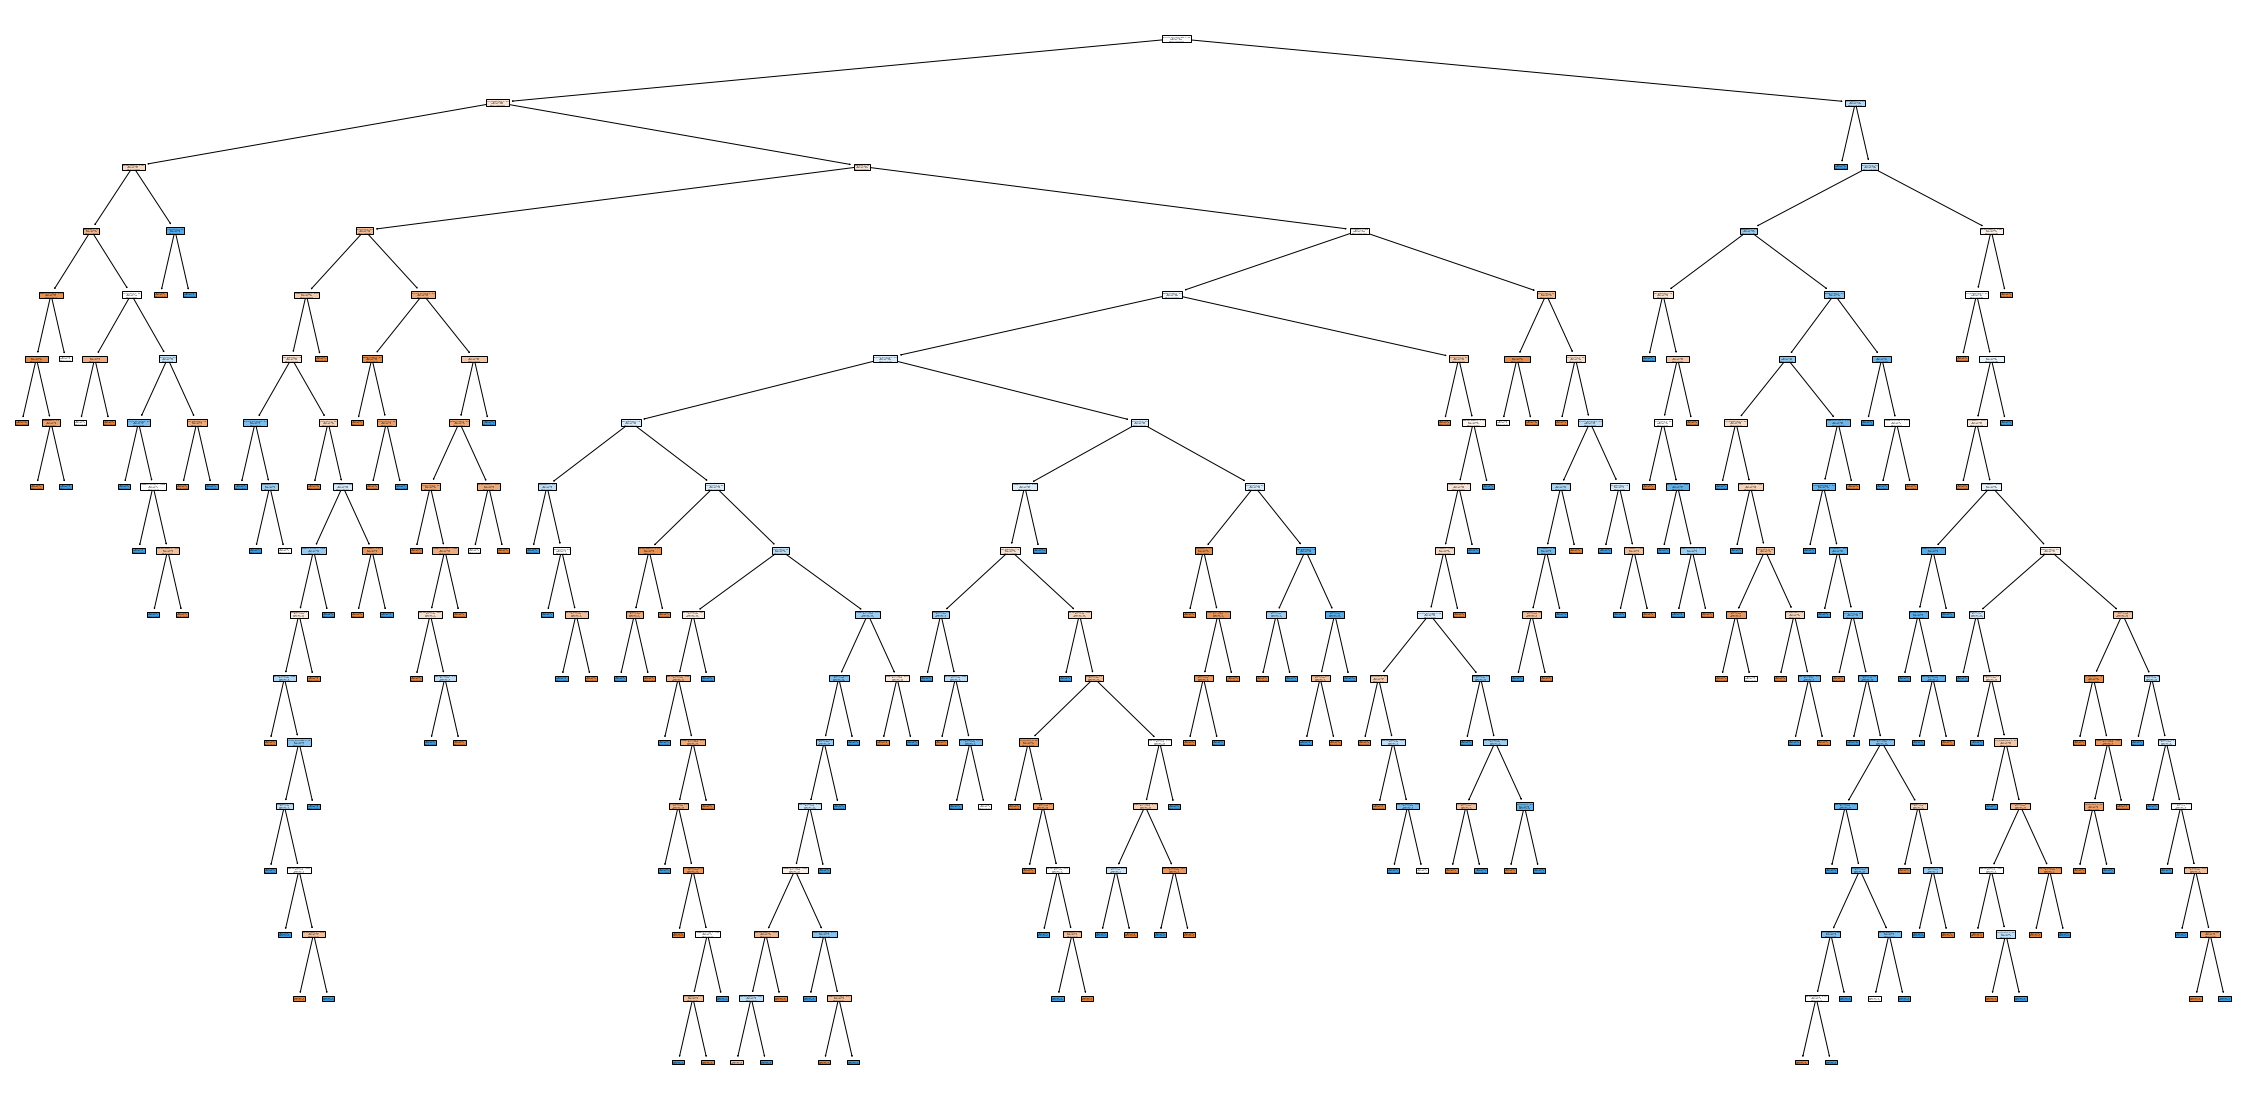

In [ ]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [ ]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [ ]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision Tree II")
dt_results2


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.855072,0.885246,0.805970,0.843750,0.709168,test,Decision Tree II
1,0.981818,1.000000,0.963899,0.981618,0.963644,train,Decision Tree II


Nuestro modelo muestra:

- Tras ajustar varias veces los hiperparámetros, seguimos apreciando un ligero overfitting, pero compensado por el valor de kappa (0.70). 

- El valor del recall (porcentaje de positivos capturados) es muy alto, lo que favorece a nuestro modelo. No obstante, el valor de la precisión es más alto que el recall, lo que nos supone un inconveniente a la hora de la elección del mejor modelo.


In [ ]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.811594,0.859649,0.731343,0.790323,0.621279,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.855072,0.885246,0.805970,0.843750,0.709168,test,Decision Tree II
1,0.981818,1.000000,0.963899,0.981618,0.963644,train,Decision Tree II


In [ ]:
df_DT_LR_results = pd.concat([df_metricas, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.702899,0.662500,0.791045,0.721088,0.408530,test,Regresión logistica estandar
1,0.743636,0.703593,0.848375,0.769231,0.486471,train,Regresión logistica estandar
2,0.811594,0.859649,0.731343,0.790323,0.621279,test,Decission Tree I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
4,0.855072,0.885246,0.805970,0.843750,0.709168,test,Decision Tree II
5,0.981818,1.000000,0.963899,0.981618,0.963644,train,Decision Tree II


In [ ]:

df_DT_LR_results.to_csv("metricas_loan_LR_DT.csv")

Recordamos nuestras cuestiones:

- Verdadero positivo: previsión de que te concedan el préstamo y ser concedido.

- Falso positivo: predicción de que te concedan el préstamo y que finalmente sea denegado. Nuestro objetivo es minimizar este caso.

- Verdadero negativo: previsión de denegación del préstamo y que efectívamente sea denegado.

- Falso negativo: previsión de denegación del préstamo y ser aceptado. Este tipo de error sería el que más nos convendría en caso de no acertar.

A la vista de las métricas obtenidas hasta el momento, desecharíamos el modelo de Decision Tree I, ya que tiene mucho overfitting. 

A continuación, vamos a ver las variables predictoras más importantes para nuestro modelo:

In [ ]:

importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

importancia_predictores_esta

,predictor,importancia
7,loanamount,0.226531
5,applicantincome,0.188743
6,coapplicantincome,0.170775
4,credit_history,0.154694
0,dependents,0.058935
1,education,0.046201
2,self_employed,0.037558
10,married_No,0.034782
13,property_area_Semiurban,0.029756
3,loan_amount_term,0.012917


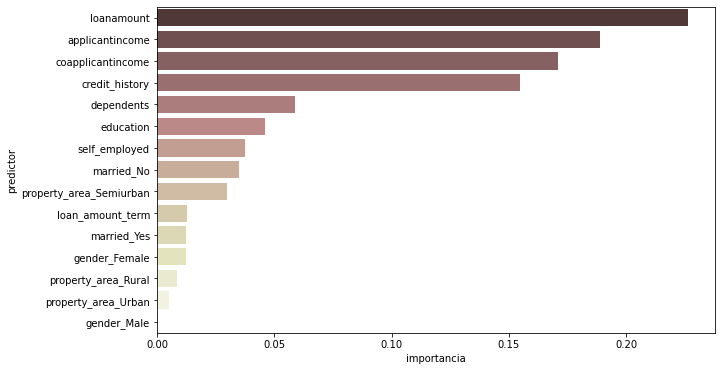

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="pink");
plt.show()

Observamos que la variable predictora más importante para nuestro modelo es *loanamount*, seguido por orden de: *applicantincome*, *coapplicantincome* y *credit_history*, como era de esperar.